In [1]:
%reload_ext autoreload
%autoreload 2

# Módulos externos
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

### Lectura de los datos del .csv

In [2]:
df_original = pd.read_csv("data/bboxes_labels.csv",skipinitialspace=True)
df_original

,file_name,bbox,x1,y1,x2,y2,width,height,bbox_area,mask_area,drops
0,img0001.jpg,0,0,0,0,0,0,0,0,0,0
1,img0002.jpg,0,67,116,96,155,29,39,1131,801,1
2,img0002.jpg,1,126,119,146,148,20,29,580,497,1
3,img0002.jpg,2,330,117,352,142,22,25,550,401,1
4,img0002.jpg,3,449,120,467,138,18,18,324,175,1
...,...,...,...,...,...,...,...,...,...,...,...
948,img0220.jpg,0,0,117,26,175,26,58,1508,1177,1
949,img0220.jpg,1,107,112,188,172,81,60,4860,4097,1
950,img0220.jpg,2,262,112,371,172,109,60,6540,4802,2
951,img0220.jpg,3,426,113,547,173,121,60,7260,3830,4


In [3]:
# Dataframe de features
headers = df_original.columns
df_features = df_original[headers[2:10]]
df_features

,x1,y1,x2,y2,width,height,bbox_area,mask_area
0,0,0,0,0,0,0,0,0
1,67,116,96,155,29,39,1131,801
2,126,119,146,148,20,29,580,497
3,330,117,352,142,22,25,550,401
4,449,120,467,138,18,18,324,175
...,...,...,...,...,...,...,...,...
948,0,117,26,175,26,58,1508,1177
949,107,112,188,172,81,60,4860,4097
950,262,112,371,172,109,60,6540,4802
951,426,113,547,173,121,60,7260,3830


In [4]:
# Dataframe de etiquetas
df_labels = df_original[headers[10]]
df_labels

0      0
1      1
2      1
3      1
4      1
      ..
948    1
949    1
950    2
951    4
952    3
Name: drops, Length: 953, dtype: int64

In [5]:
# Conversión de features a matriz NumPy
arr_features = df_features.to_numpy()

# Conversión de etiquetas a matriz NumPy
arr_labels = df_labels.to_numpy()

print("Dimensiones de la matriz de features:", arr_features.shape)
print("Dimensiones de la matriz de etiquetas:", arr_labels.shape)

Dimensiones de la matriz de features: (953, 8)
Dimensiones de la matriz de etiquetas: (953,)


In [6]:
# Normalización de las features

arr_features_norm = []
for feature in arr_features:
    x1 = feature[0]/800
    y1 = feature[1]/600
    x2 = feature[2]/800
    y2 = feature[3]/600
    width = feature[4]/800
    height = feature[5]/600
    bbox_area = feature[6]/(800*600)
    mask_area = feature[7]/(800*600)
    arr_features_norm.append(np.array([x1, y1, x2, y2, width, height, bbox_area, mask_area]))
arr_features_norm = np.array(arr_features_norm)

print(arr_features_norm.shape)

(953, 8)


### Entrenamiento del modelo

In [7]:
# Split de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(arr_features_norm, arr_labels, test_size=0.2, random_state=42)

In [ ]:
# Creación del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),  # Capa oculta con 64 neuronas
    Dense(32, activation='relu'),                   # Otra capa oculta
    Dense(1)                                        # Capa de salida (sin activación para regresión)
])

model.summary()

In [9]:
# Compilación del modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='mse',          # Error cuadrático medio como función de pérdida
              metrics=['mae'])     # Error absoluto medio como métrica adicional

In [10]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train,
                    epochs=200, 
                    batch_size=5, 
                    validation_split=0.2,
                    verbose=1)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.7486 - mae: 2.6369 - val_loss: 7.1115 - val_mae: 1.9908
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9056 - mae: 2.1447 - val_loss: 5.7173 - val_mae: 1.6146
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5530 - mae: 1.8516 - val_loss: 4.2437 - val_mae: 1.3531
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3943 - mae: 1.7794 - val_loss: 3.5726 - val_mae: 1.3288
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8968 - mae: 1.6215 - val_loss: 3.2875 - val_mae: 1.3523
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2995 - mae: 1.6420 - val_loss: 3.0372 - val_mae: 1.3249
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4465 - mae: 1.5290 - val_loss: 2.8421 - val_mae: 1.3106
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2979 - mae: 1.6711 - val_loss: 2.6128 - val_mae: 1.2586
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [11]:
# Evaluar el modelo
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nError absoluto medio en prueba: {test_mae:.4f}")


Error absoluto medio en prueba: 0.4626


In [12]:
# Hacer predicciones
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


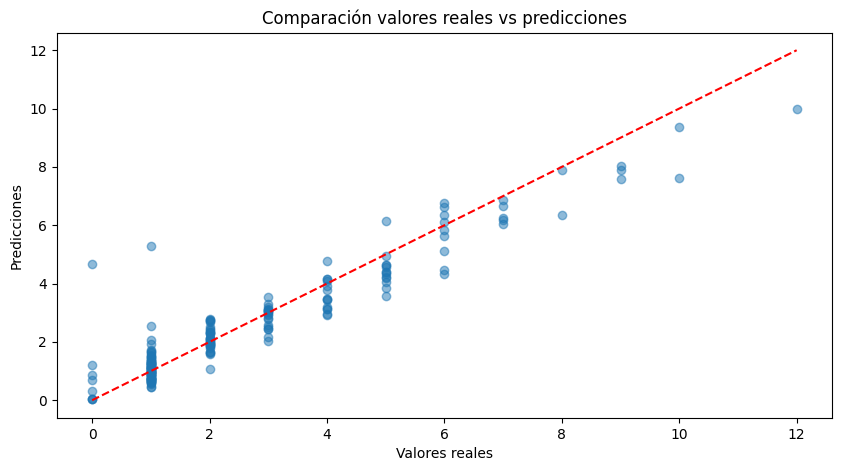

In [13]:
# 8. Visualizar resultados (opcional)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación valores reales vs predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

## Finetuning con nuevas labels

In [16]:
df_newdata = pd.read_csv("data/bboxes_payload_labels.csv",skipinitialspace=True)
df_newdata

,file_name,bbox,x1,y1,x2,y2,width,height,bbox_area,mask_area,drops
0,img0001.jpg,0,0,0,0,0,0,0,0,0,0
1,img0011.jpg,0,28,165,57,204,29,39,1131,384,0
2,img0011.jpg,1,56,205,96,227,40,22,880,338,0
3,img0011.jpg,2,64,169,81,184,17,15,255,154,0
4,img0011.jpg,3,74,308,168,342,94,34,3196,2688,1
...,...,...,...,...,...,...,...,...,...,...,...
659,img1167.jpg,1,97,301,175,338,78,37,2886,2402,1
660,img1167.jpg,2,252,311,344,340,92,29,2668,1761,3
661,img1167.jpg,3,469,313,543,351,74,38,2812,2480,1
662,img1167.jpg,4,664,313,735,354,71,41,2911,2310,1


In [17]:
# Dataframe de features
headers_newdata = df_newdata.columns
df_features_newdata = df_newdata[headers_newdata[2:10]]
df_features_newdata

,x1,y1,x2,y2,width,height,bbox_area,mask_area
0,0,0,0,0,0,0,0,0
1,28,165,57,204,29,39,1131,384
2,56,205,96,227,40,22,880,338
3,64,169,81,184,17,15,255,154
4,74,308,168,342,94,34,3196,2688
...,...,...,...,...,...,...,...,...
659,97,301,175,338,78,37,2886,2402
660,252,311,344,340,92,29,2668,1761
661,469,313,543,351,74,38,2812,2480
662,664,313,735,354,71,41,2911,2310


In [18]:
# Dataframe de etiquetas
df_labels_newdata = df_newdata[headers[10]]
df_labels_newdata

0      0
1      0
2      0
3      0
4      1
      ..
659    1
660    3
661    1
662    1
663    1
Name: drops, Length: 664, dtype: int64

In [19]:
# Conversión de features a matriz NumPy
arr_features_newdata = df_features_newdata.to_numpy()

# Conversión de etiquetas a matriz NumPy
arr_labels_newdata = df_labels_newdata.to_numpy()

print("Dimensiones de la matriz de features:", arr_features_newdata.shape)
print("Dimensiones de la matriz de etiquetas:", arr_labels_newdata.shape)

Dimensiones de la matriz de features: (664, 8)
Dimensiones de la matriz de etiquetas: (664,)


In [20]:
# Normalización de las features

arr_features_norm_newdata = []
for feature in arr_features_newdata:
    x1 = feature[0]/800
    y1 = feature[1]/600
    x2 = feature[2]/800
    y2 = feature[3]/600
    width = feature[4]/800
    height = feature[5]/600
    bbox_area = feature[6]/(800*600)
    mask_area = feature[7]/(800*600)
    arr_features_norm_newdata.append(np.array([x1, y1, x2, y2, width, height, bbox_area, mask_area]))
arr_features_norm_newdata = np.array(arr_features_norm_newdata)

print(arr_features_norm_newdata.shape)

(664, 8)


In [21]:
# Split de datos en entrenamiento y prueba
X_train_newdata, X_test_newdata, y_train_newdata, y_test_newdata = train_test_split(arr_features_norm_newdata, arr_labels_newdata, test_size=0.2, random_state=42)

In [22]:
# Entrenamiento del modelo
history2 = model.fit(X_train_newdata, y_train_newdata,
                    epochs=200, 
                    batch_size=5, 
                    validation_split=0.2,
                    verbose=1)

Epoch 1/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8387 - mae: 0.6443 - val_loss: 0.6175 - val_mae: 0.5278
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8480 - mae: 0.6577 - val_loss: 0.5288 - val_mae: 0.4986
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7136 - mae: 0.5919 - val_loss: 0.6809 - val_mae: 0.5575
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5487 - mae: 0.6125 - val_loss: 0.5383 - val_mae: 0.5175
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6330 - mae: 0.6172 - val_loss: 0.6254 - val_mae: 0.5274
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6741 - mae: 0.6327 - val_loss: 0.5567 - val_mae: 0.5059
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5040 - mae: 0.5994 - val_loss: 0.5741 - val_mae: 0.5098
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2605 - mae: 0.5948 - val_loss: 0.5682 - val_mae: 0.5122
Epoch 9/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.566

In [23]:
# Guardar el modelo
model.save('models/dropcounter_v02_model.keras')  # Puedes usar .h5 o .keras

# Para cargar y usar el modelo en otro código:
"""
from tensorflow.keras.models import load_model

# Cargar el modelo
loaded_model = load_model('mi_modelo_regresion.keras')

# Hacer una predicción con nuevos datos
nuevos_datos = np.array([[x1, y1, x2, y2, bbox_w, bbox_h, bbox_a, mask_a]])  # Reemplaza con tus valores
prediccion = loaded_model.predict(nuevos_datos)
print(f"Predicción: {prediccion[0][0]}")
"""

'\nfrom tensorflow.keras.models import load_model\n\n# Cargar el modelo\nloaded_model = load_model(\'mi_modelo_regresion.keras\')\n\n# Hacer una predicción con nuevos datos\nnuevos_datos = np.array([[x1, y1, x2, y2, bbox_w, bbox_h, bbox_a, mask_a]])  # Reemplaza con tus valores\nprediccion = loaded_model.predict(nuevos_datos)\nprint(f"Predicción: {prediccion[0][0]}")\n'